In [ ]:
#Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Cleaning and Preparation
- Load the dataset and handle any missing or incorrect values.
- Convert the 'year' column to numeric and address any anomalies (e.g., future years, very old years that are likely errors).

In [ ]:
#Loading the dataset and getting an idea of it:
df = pd.read_csv("/gcar_data (1).csv")
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45724,73409,ford,Ford Kuga,silver,02/2021,2021,31550,165,224,Automatic,Hybrid,"1,2 l/100 km",29 g/km,21990.0,Plug-In Hybrid Titanium Navi PPS Winter-Paket 2.5
45725,11764,audi,Audi SQ7,grey,11/2016,2016,45990,320,435,Automatic,Diesel,"7,6 l/100 km",199 g/km,170246.0,4.0 TDI *Exclusive*Garantie*Finanzierung*
45726,72695,ford,Ford EcoSport,yellow,11/2021,2021,18950,92,125,Manual,Petrol,5 l/100 km,114 g/km,6686.0,1.0 Titanium*LED*DAB+*PTC*SHZ
45727,44382,citroen,Citroen C3,grey,11/2015,2015,6500,50,68,Manual,Petrol,"4,4 l/100 km",- (g/km),59700.0,C3 Pure Tech (VTi) 68 Selection 10/24 Scheckheft


Checking null values:

In [ ]:
#Checking null values:
print(df.isnull().sum())


Unnamed: 0                     0
brand                          0
model                          1
color                         30
registration_date              1
year                           1
price_in_euro                  1
power_kw                      41
power_ps                      40
transmission_type              1
fuel_type                      1
fuel_consumption_l_100km    5161
fuel_consumption_g_km          1
mileage_in_km                 27
offer_description              1
dtype: int64


In [ ]:
#There are null values in - 'color','registration_date','power_kw','power_ps','fuel_consumption_l_100km' and 'mileage_in_km'.
#Let's handle these null values

Cleaning the dataset(Handling null values):

In [ ]:
df['color'].fillna(df['color'].mode(),inplace=True)


In [ ]:
df.dropna(subset=['registration_date'], inplace=True)

In [ ]:
df['power_kw'] = pd.to_numeric(df['power_kw'], errors='coerce')


In [ ]:
df['power_kw'].fillna(df['power_kw'].median(), inplace=True)


In [ ]:
df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce')

In [ ]:
df['power_ps'].fillna(df['power_ps'].median(), inplace=True)

In [ ]:
df['mileage_in_km'] = pd.to_numeric(df['mileage_in_km'], errors='coerce')
df['mileage_in_km'].fillna(df['mileage_in_km'].median(), inplace=True)

In [ ]:
#Converting the 'year' column to numeric:

Changing year column to numeric:

In [ ]:
df['year'] = pd.to_numeric(df['year'], errors = 'coerce')

In [ ]:
df.describe()

,Unnamed: 0,year,power_kw,power_ps,mileage_in_km
count,45728.000000,45706.000000,45728.000000,45728.000000,4.572800e+04
mean,50069.751859,2016.464687,140.649471,190.949571,8.551018e+04
std,28780.262088,9.426729,85.699678,112.511290,7.669850e+04
min,4.000000,1995.000000,5.000000,7.000000,0.000000e+00
25%,25355.750000,2014.000000,88.000000,120.000000,2.562475e+04
50%,49964.500000,2018.000000,117.000000,159.000000,6.844250e+04
75%,74936.250000,2020.000000,160.000000,218.000000,1.267000e+05
max,99999.000000,3700.000000,2016.000000,2017.000000,2.223400e+06


In [ ]:
df = df[(df['year'] >= 1900) & (df['year'] <= 2024)]

2. Descriptive Statistics
  
- Provide summary statistics (mean, median, mode, range, variance, standard deviation) for the numeric columns: price_in_euro, power_kw, power_ps,mileage_in_km.
- Identify the most and least expensive cars by brand and model.

In [ ]:
df.describe()

,Unnamed: 0,year,power_kw,power_ps,mileage_in_km
count,45705.000000,45705.000000,45705.000000,45705.000000,4.570500e+04
mean,50072.731080,2016.427853,140.371644,190.929701,8.552971e+04
std,28780.893408,5.181673,82.543202,112.206265,7.670947e+04
min,4.000000,1995.000000,5.000000,7.000000,0.000000e+00
25%,25356.000000,2014.000000,88.000000,120.000000,2.563000e+04
50%,49970.000000,2018.000000,117.000000,159.000000,6.844250e+04
75%,74941.000000,2020.000000,160.000000,218.000000,1.267860e+05
max,99999.000000,2023.000000,735.000000,999.000000,2.223400e+06


In [ ]:
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')

<ipython-input-22-f294a577627d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')


In [ ]:
# List of columns to calculate variance for
X = ['price_in_euro', 'power_kw', 'power_ps', 'mileage_in_km']


In [ ]:
# Calculate and print variance for each column individually
for column in X:
    variance = df[column].var()
    print(f"Variance of {column}: {variance}")

Variance of price_in_euro: 1905797840.3603716
Variance of power_kw: 6813.380169152269
Variance of power_ps: 12590.245823788362
Variance of mileage_in_km: 5884343120.738565


In [ ]:
most_expensive = df.loc[df['price_in_euro'].idxmax(),['brand', 'model', 'price_in_euro']]
print(f"Most expensive car: {most_expensive}")

Most expensive car: brand                ferrari
model            Ferrari F12
price_in_euro        1290000
Name: 42555, dtype: object


In [ ]:
least_expensive = df.loc[df['price_in_euro'].idxmin(),['brand', 'model', 'price_in_euro']]
print(f"Least expensive car:{least_expensive}")

Least expensive car:brand                   ford
model            Ford Fiesta
price_in_euro            250
Name: 17183, dtype: object


3. Distribution Analysis
- Create histograms to visualize the distributions of price_in_euro , power_kw , mileage_in_km . Discuss any skewness in the data.

In [ ]:
#Creating histograms to visualize the distributions of 'price_in_euro','power_kw','mileage_in_km':

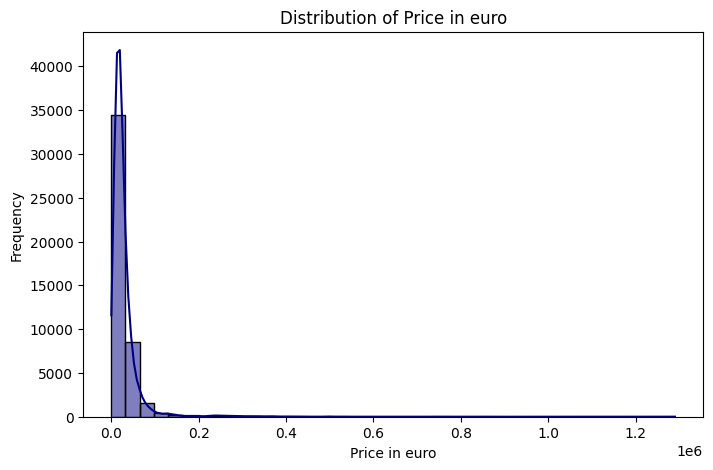

In [ ]:
plt.figure(figsize = (8,5))
sns.histplot(df['price_in_euro'],bins= 40,kde=True,color = 'navy',edgecolor= 'black')
plt.title('Distribution of Price in euro')
plt.xlabel('Price in euro')
plt.ylabel('Frequency')
plt.show()


Conclusion:

1.) The histogram is left-skewed with few outliers show that the cars are in wide price range but most of the cars lie within 0.0 to 0.2 price range suggesting that this is the average price range.

2.) There are high-value outliers on the right side of the distribution suggests the inclusion of luxury or rare vehicles, but on a very few scale.

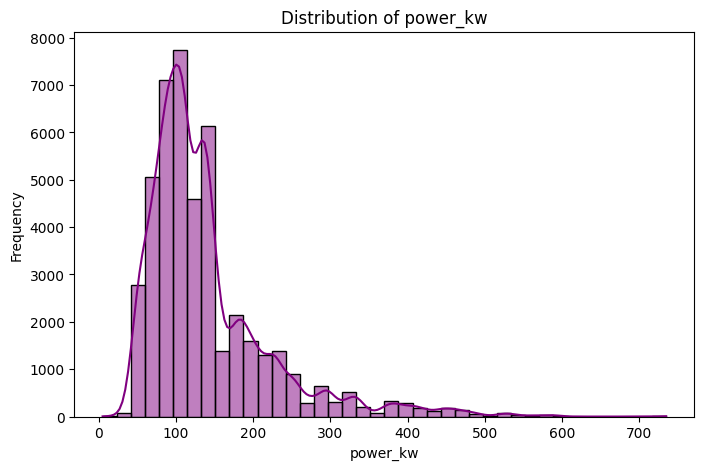

In [ ]:
plt.figure(figsize = (8,5))
sns.histplot(df['power_kw'],bins = 40,kde=True,color='purple',edgecolor='black')
plt.title('Distribution of power_kw')
plt.xlabel('power_kw')
plt.ylabel('Frequency')
plt.show()

Conclusion:

1.) The histogram shows that the power_kw data is left skewed, showing that a lot of cars are in power range between 100-150.

2.) There are also significant amount of cars lying in the power range of 150-300, but they are so less in comparison with 100-150 range.

3.) Overall, the histogram suggests that while there is a broad power levels, the majority of vehicles fall within a mid-range power bracket. The presence of vehicles with both low and high power outputs suggests a diverse dataset with a range of vehicle types and performance characteristics.



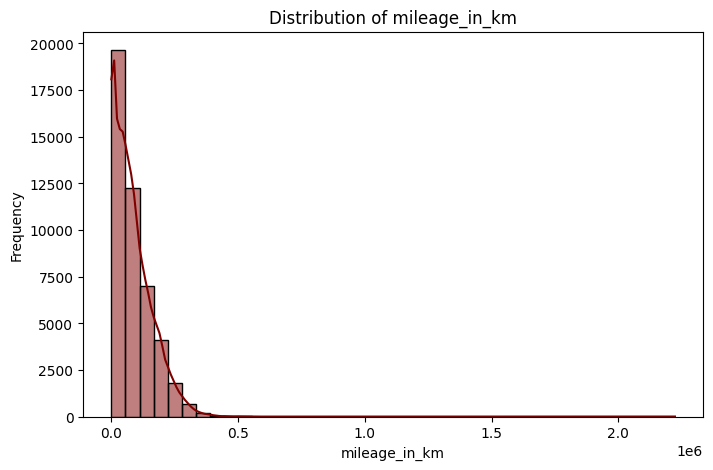

In [ ]:
plt.figure(figsize = (8,5))
sns.histplot(df['mileage_in_km'],bins = 40,kde=True,color='maroon',edgecolor='black')
plt.title('Distribution of mileage_in_km')
plt.xlabel('mileage_in_km')
plt.ylabel('Frequency')
plt.show()

Conclusion : The data is left skewed with kde line falling steeply showing that there are lot of high mileage cars whereas low mileage ones are not significantly visible.

4. Categorical Data Analysis
- Count and visualize the number of vehicles by brand . Which brand has the most listings?
- Analyze the distribution of transmission_type and fuel_type across the dataset.

In [ ]:
vehicle_counts = df['brand'].value_counts()
vehicle_counts

,count
brand,
audi,9513
bmw,9201
ford,8562
hyundai,3191
kia,2701
fiat,2357
citroen,1897
dacia,1510
land-rover,1408


In [ ]:
import warnings
warnings.filterwarnings('ignore')

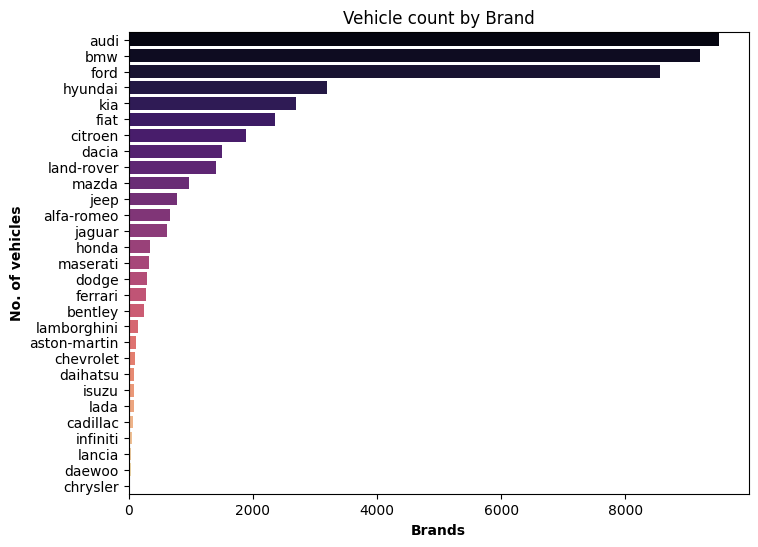

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=vehicle_counts.values,y=vehicle_counts.index,palette = 'magma')
plt.title('Vehicle count by Brand')
plt.xlabel('Brands',fontsize=10,fontweight='bold')
plt.ylabel('No. of vehicles',fontsize=10,fontweight='bold')
plt.show()

Conclusion : The data here sugests that Audi is having most number of vehicle listings with 9513 vehicles.

In [ ]:
Transmission_type = df['transmission_type'].value_counts(normalize=True)
Transmission_type

,proportion
transmission_type,
Automatic,0.534559
Manual,0.458899
Unknown,0.005229
Semi-automatic,0.001313


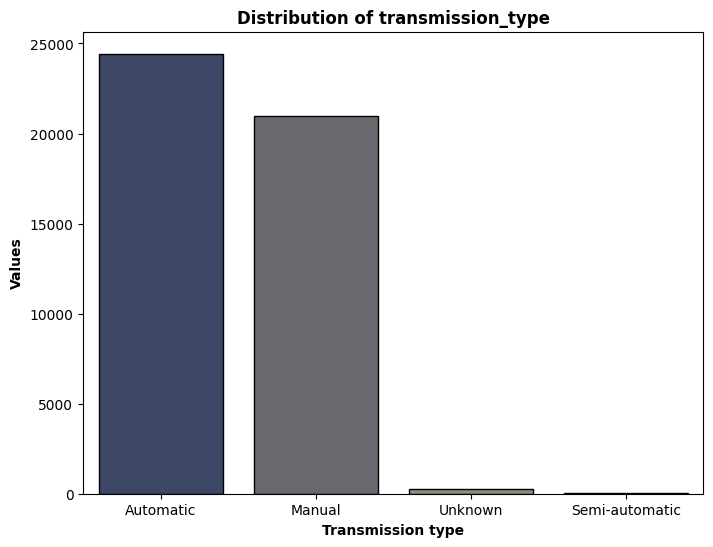

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='transmission_type',data=df,palette = 'cividis',edgecolor='black')
plt.title('Distribution of transmission_type',fontweight='bold')
plt.xlabel('Transmission type',fontsize=10,fontweight='bold')
plt.ylabel('Values',fontsize=10,fontweight='bold')
plt.show()

Conclusion : The histogram and the value counts here show that more than 50% vehicles are in "Automatic" category, with 'Manual' category having 45%
share and Semi-automatic having least share of 0.01%.

In [ ]:
df['fuel_type'].value_counts()

,count
fuel_type,
Petrol,24961
Diesel,17088
Hybrid,1965
Electric,1123
LPG,404
Diesel Hybrid,65
Other,37
CNG,26
Hydrogen,16


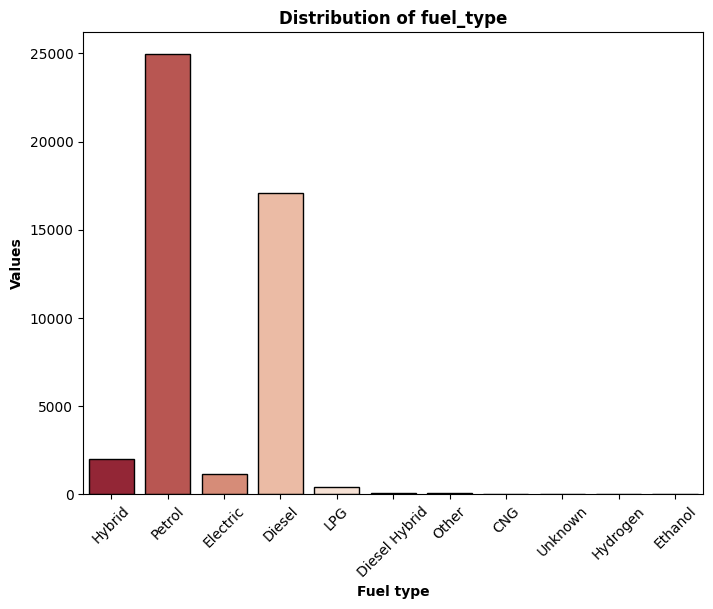

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='fuel_type',data=df,palette ='RdBu',edgecolor='black')
plt.title('Distribution of fuel_type',fontweight='bold')
plt.xlabel('Fuel type',fontsize=10,fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Values',fontsize=10,fontweight='bold')
plt.show()

CONCLUSION :

1.) Petrol and Diesel fuel types are having the most share.

2.) Rest of the fuel types are not that favourable.

5. Time Series Analysis
- Plot the number of vehicles registered each year. Is there a trend indicating an increase or decrease in registrations?

In [ ]:
registrations=df['year'].value_counts().sort_index()
registrations

,count
year,
1995.0,9
1996.0,22
1997.0,42
1998.0,83
1999.0,109
2000.0,136
2001.0,162
2002.0,220
2003.0,332


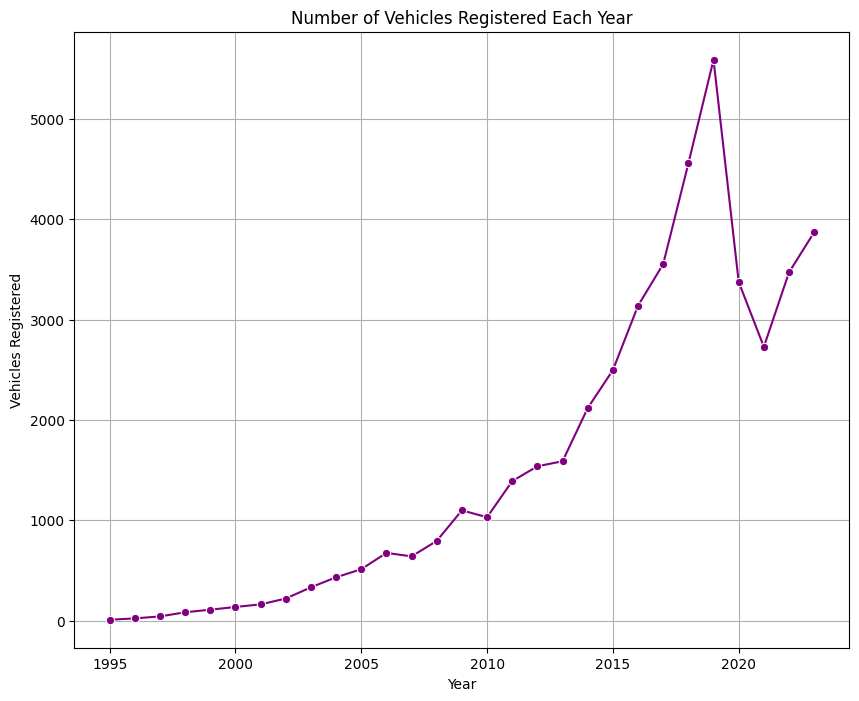

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x=registrations.index,y=registrations.values,marker='o',color='purple')
plt.title('Number of Vehicles Registered Each Year')
plt.xlabel('Year')
plt.ylabel('Vehicles Registered')
plt.grid(True)
plt.show()

Conclusion:

The line-chart here shows that the amount of vehicle registrations has been increasing continuously starting from 1995 and reaching to it's highest till 2018-19 with more than 5000 registrations, then fell downwards after that(b/w 2000-3000), and the again increased after 2020.

6. Correlation Analysis
- Analyze the relationship between price_in_euro and power_kw , power_ps . Use scatter plots and calculate correlation coefficients.
- Explore how fuel_consumption_l_100km relates to power_kw and power_ps .

In [ ]:
# Clean and convert 'fuel_consumption_l_100km' (handling formats like "5,1 l/100 km")
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'].str.replace(',', '.').str.extract('(\d+.\d+)')[0], errors='coerce')

In [ ]:
correlation_matrix = df[['price_in_euro', 'power_kw', 'power_ps']].corr()
correlation_matrix

,price_in_euro,power_kw,power_ps
price_in_euro,1.000000,0.661265,0.661290
power_kw,0.661265,1.000000,0.999996
power_ps,0.661290,0.999996,1.000000


Conclusion:

1.) The correlation between 'price_in_euro' and 'power_kw' is 0.66, which indicates a moderate positive correlation, i.e; when 'power_kw' increases the price of vehicle tends to increase as well, but there are also some other factors that are responsible for price increase.

2.) The correlation between 'price_in_euro' and 'power_ps' is 0.66, which is similar to 'power_kw. As the power in PS increases, the price in Euro tends to increase similarly.

3.) The correlation coefficient of 0.999996 indicates an almost perfect positive correlation between power_kw and power_ps, as both are units of power.

In [ ]:
correlation_matrix_fuel = df[['fuel_consumption_l_100km', 'power_kw', 'power_ps']].corr()
correlation_matrix_fuel

,fuel_consumption_l_100km,power_kw,power_ps
fuel_consumption_l_100km,1.000000,0.053673,0.053650
power_kw,0.053673,1.000000,0.999996
power_ps,0.053650,0.999996,1.000000


Conclusion:

1.) The correlation coefficient of approximately 0.054 suggests a very weak positive relationship between fuel_consumption_l_100km and power_kw. This indicates that there is almost no linear relationship between the power of the vehicle and its fuel consumption in this dataset.

2.)Similarly, the correlation coefficient of approximately 0.054 suggests a very weak positive relationship between fuel_consumption_l_100km and power_ps. Like the kW measure, this also indicates a minimal linear relationship between power and fuel consumption.

3.)The correlation coefficient of 0.999996 between power_kw and power_ps confirms that these two measures are almost identical, which is expected since they are just different units representing the same concept (engine power)

The very weak correlations between fuel consumption and power suggest that in this particular dataset, fuel consumption does not strongly depend on engine power. Other factors might play a more significant role in determining fuel consumption.

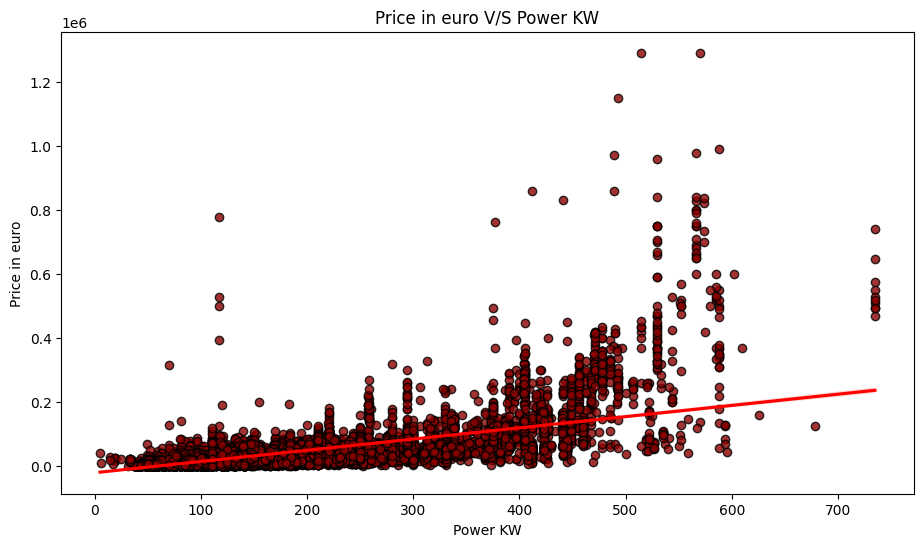

In [ ]:
plt.figure(figsize=(11,6))
sns.regplot(y='price_in_euro',x='power_kw',data=df,scatter_kws={"color": "darkred",'edgecolor': 'black'}, line_kws={"color": "red"})
plt.title('Price in euro V/S Power KW')
plt.ylabel('Price in euro')
plt.xlabel('Power KW')
plt.show()

Conclusion:

The scatter plot here shows that there is a wide quantity of cars that fall mostly in medium price range, i.e; between 0.0-0.4, and there are only few vehicles lying in high-price range

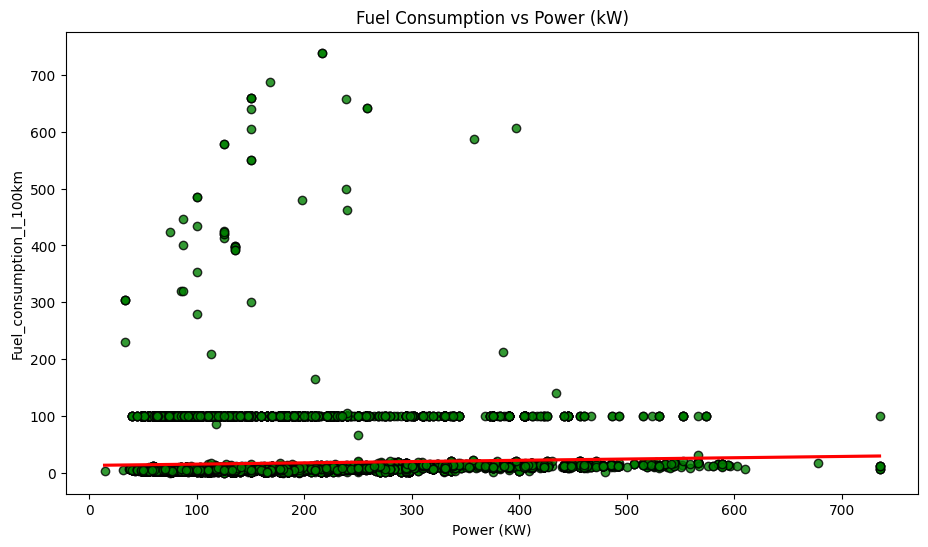

In [ ]:
plt.figure(figsize=(11,6))
sns.regplot(x='power_kw',y='fuel_consumption_l_100km',data=df,scatter_kws={"color":"green",'edgecolor':'black'},line_kws={"color":"red"})
plt.title('Fuel Consumption vs Power (kW)')
plt.xlabel('Power (KW)')
plt.ylabel('Fuel_consumption_l_100km')
plt.show()

**7. Grouped Data Analysis**
- Compare the average price of vehicles grouped by fuel_type . Which fuel type has the highest average price?
- Group the data by brand and transmission_type , and analyze the average mileage.

In [ ]:
grouped_data= df.groupby('fuel_type')['price_in_euro'].mean().sort_values(ascending=False)
grouped_data

,price_in_euro
fuel_type,
Unknown,69087.800000
Diesel Hybrid,43576.015385
Electric,43003.093500
Hybrid,40922.534351
Hydrogen,39253.750000
Petrol,30818.389848
Other,29827.108108
LPG,26769.133663
Diesel,24868.439724


CONCLUSION :

1.) Diesel hybrid and electric vehicles are the most expensive ones.

2.) LPG & Diesel are on the cheaper side of the Average Price, i.e; they are the most affordable.

In [ ]:
average_mileage = df.groupby(['brand','transmission_type'])['mileage_in_km'].mean().sort_values(ascending=False)
average_mileage

,,mileage_in_km
brand,transmission_type,
daihatsu,Unknown,182000.000000
bmw,Semi-automatic,174295.571429
audi,Unknown,167531.689655
lancia,Automatic,157214.476190
audi,Semi-automatic,155186.800000
...,...,...
chrysler,Automatic,16771.500000
dacia,Unknown,9050.000000
cadillac,Unknown,4500.000000


9. Multivariate Analysis
- Create pair plots of the following variables: price_in_euro , power_kw , mileage_in_km , and fuel_consumption_l_100km . What patterns can be observed in these plots?

In [ ]:
selected_columns = df[['price_in_euro', 'power_kw', 'mileage_in_km', 'fuel_consumption_l_100km']]

<Figure size 1000x800 with 0 Axes>

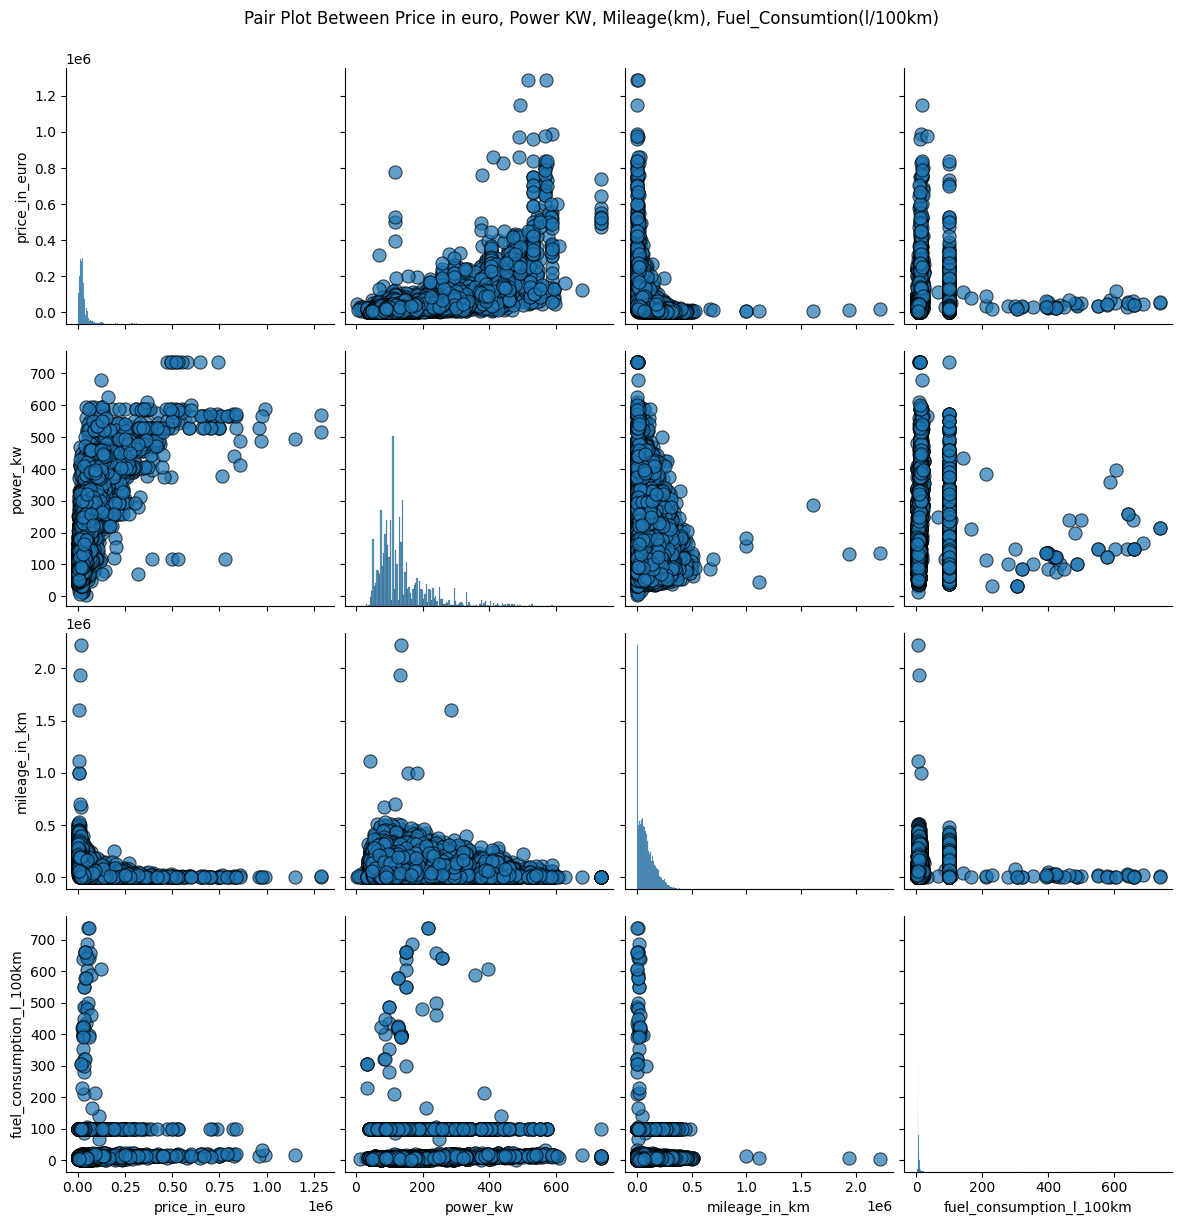

In [ ]:
plt.figure(figsize= (10, 8))
sns.pairplot(selected_columns, diag_kind='hist',
             plot_kws={'alpha':0.7, 's':90, 'edgecolor':'black'},
             height=3.0)
plt.suptitle('Pair Plot Between Price in euro, Power KW, Mileage(km), Fuel_Consumtion(l/100km)', y=1.02)
plt.show()

In [ ]:
df[['price_in_euro','mileage_in_km']].describe()

,price_in_euro,mileage_in_km
count,4.570500e+04,4.570500e+04
mean,2.931511e+04,8.552971e+04
std,4.365544e+04,7.670947e+04
min,2.500000e+02,0.000000e+00
25%,1.290000e+04,2.563000e+04
50%,2.048000e+04,6.844250e+04
75%,3.219000e+04,1.267860e+05
max,1.290000e+06,2.223400e+06


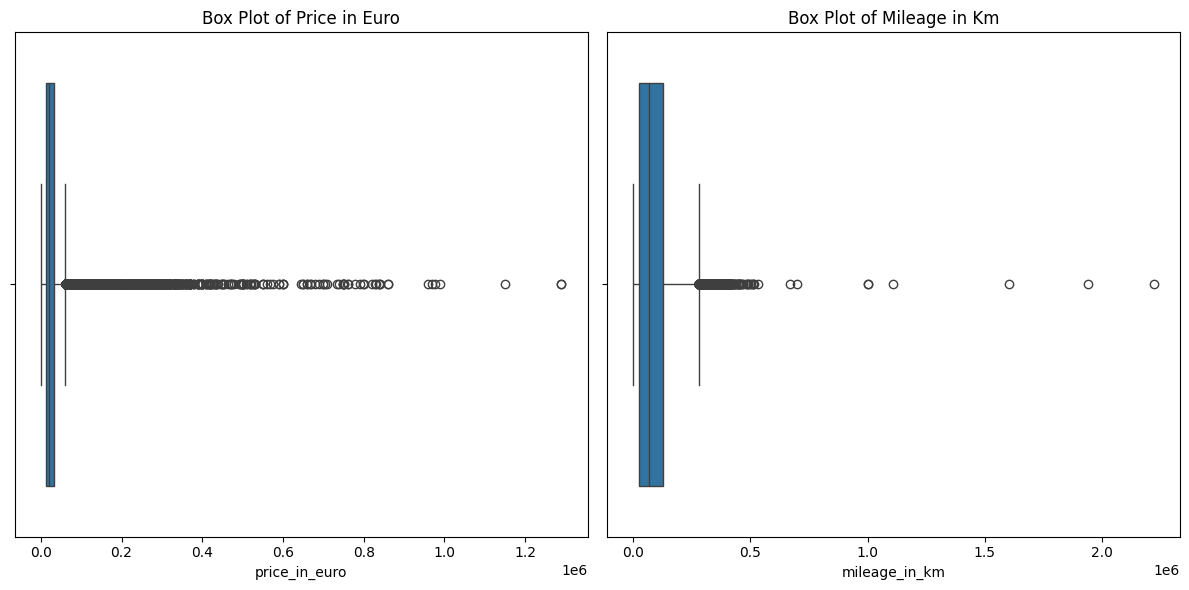

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price_in_euro'])
plt.title('Box Plot of Price in Euro')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['mileage_in_km'])
plt.title('Box Plot of Mileage in Km')

plt.tight_layout()
plt.show()
